<a href="https://colab.research.google.com/github/Mdnazmulhasanmasum/AI/blob/main/Cancer_in_brest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def summary_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Uniques'] = df.nunique().values
    return summary

In [3]:

df = pd.read_csv('/content/Breast_Cancer.csv')
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.loc[df['Status'] == 'Alive', ['Status']] = 0
df.loc[df['Status'] == 'Dead', ['Status']] = 1

In [5]:
basic_EDA(df)

Number of Samples: 4024,
Number of Features: 16,
Duplicated Entries: 1,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


/tmp/ipython-input-2661276371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Status', data=df,palette="flare")


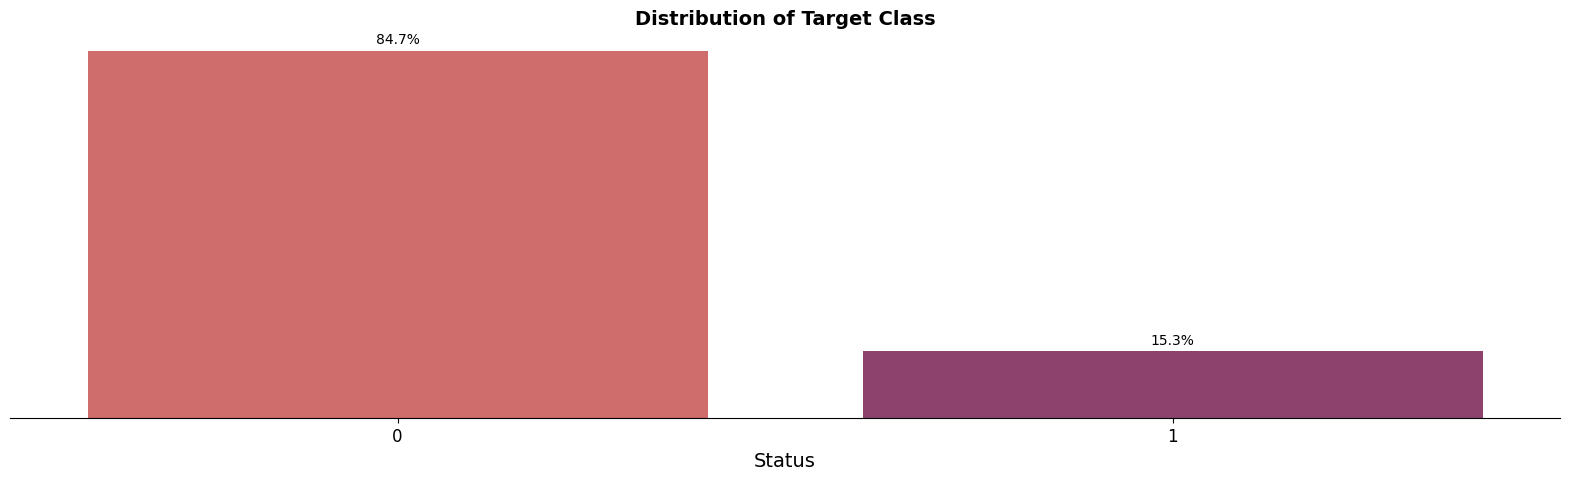

In [6]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Status', data=df,palette="flare")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y),
                    ha='center', va='bottom',
                    color='black', xytext=(0, 3),
                    rotation = 'horizontal',
                    textcoords='offset points')

sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Status',fontsize = 14)
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False)
plt.title('Distribution of Target Class',fontsize = 14,weight = 'bold');

In [7]:
summary_table(df)

,Name,dtypes,Uniques
0,Age,int64,40
1,Race,object,3
2,Marital Status,object,5
3,T Stage,object,4
4,N Stage,object,3
5,6th Stage,object,5
6,differentiate,object,4
7,Grade,object,4
8,A Stage,object,2
9,Tumor Size,int64,110


In [8]:
df_obj_cols = list(df.select_dtypes(['object']).columns)
df_num_cols = list(df.select_dtypes(np.number).columns)

In [9]:
def percentPlot(df,categorical_class,title,hue):
    j = 0
    for i in categorical_class[:-1]:

        plt.figure(figsize=(20,5))
        ax = sns.countplot(x=i, data=df,palette="flare", hue = hue)

        for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
                x = p.get_x() + p.get_width()/2
                y = p.get_y() + p.get_height() + 0.02
                ax.annotate(percentage, (x, y),
                            ha='center', va='bottom',
                            color='black', xytext=(0, 3),
                            rotation = 'horizontal',
                            textcoords='offset points')

        sns.despine(top=True, right=True, left=True, bottom=False)
        plt.xticks(rotation=0,fontsize = 12)
        ax.set_xlabel(title[j],fontsize = 14)
        ax.set(yticklabels=[])
        ax.axes.get_yaxis().set_visible(False)
        plt.title('Distribution of '+title[j],fontsize = 14,weight = 'bold')
        j+=1
        plt.show()

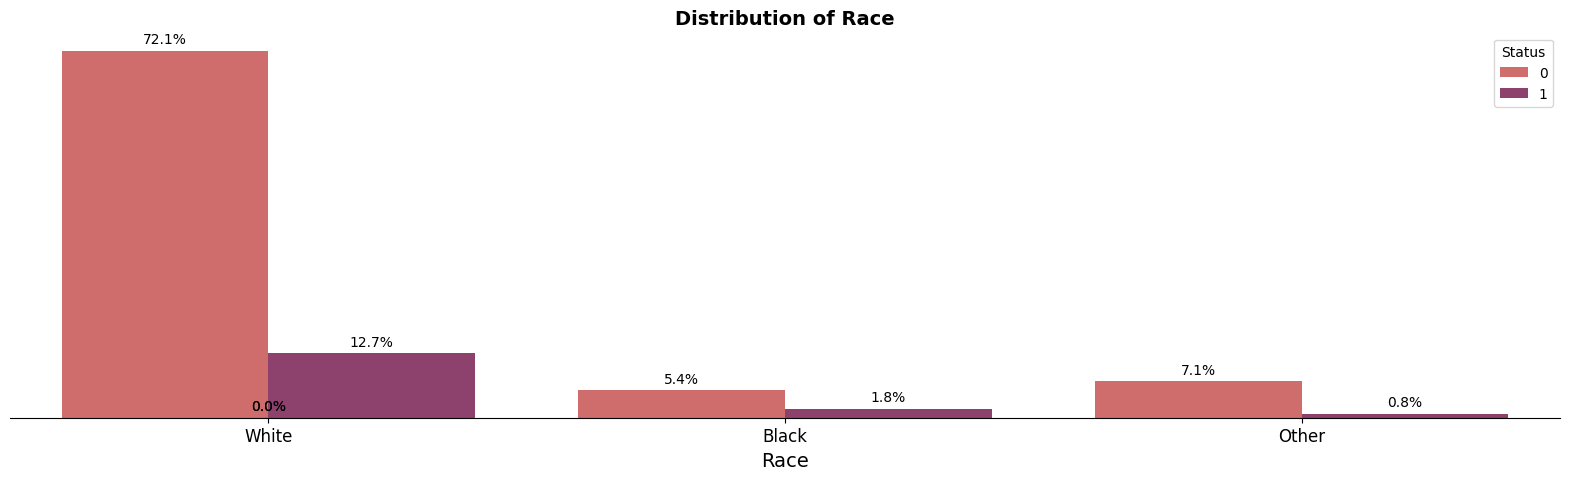

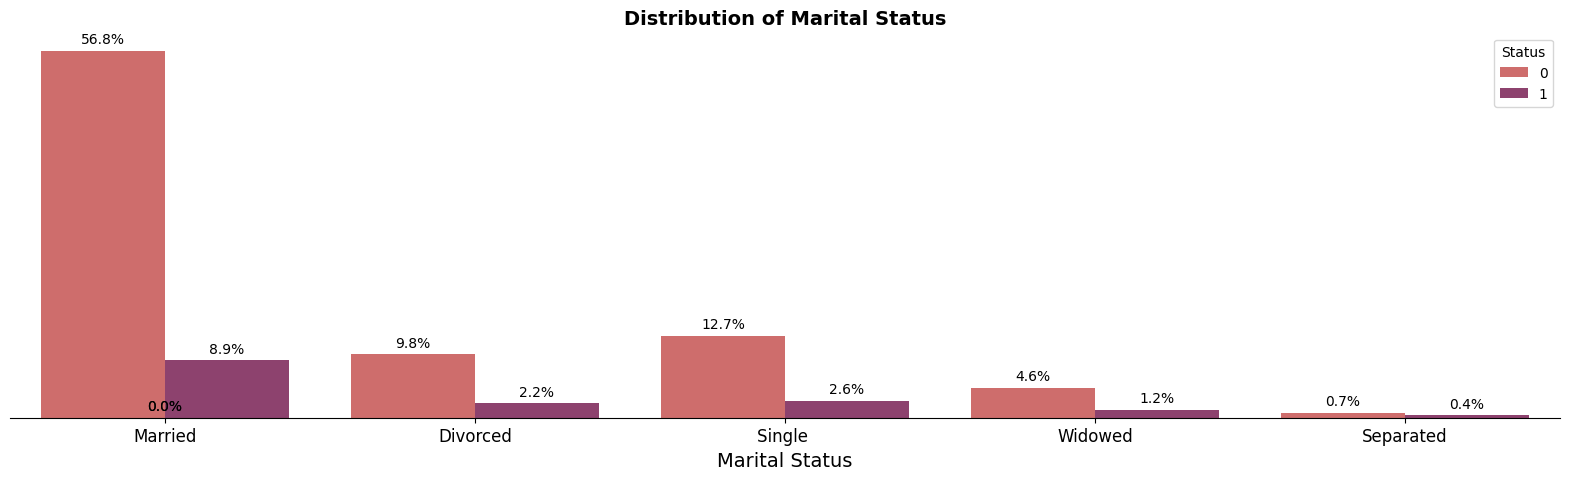

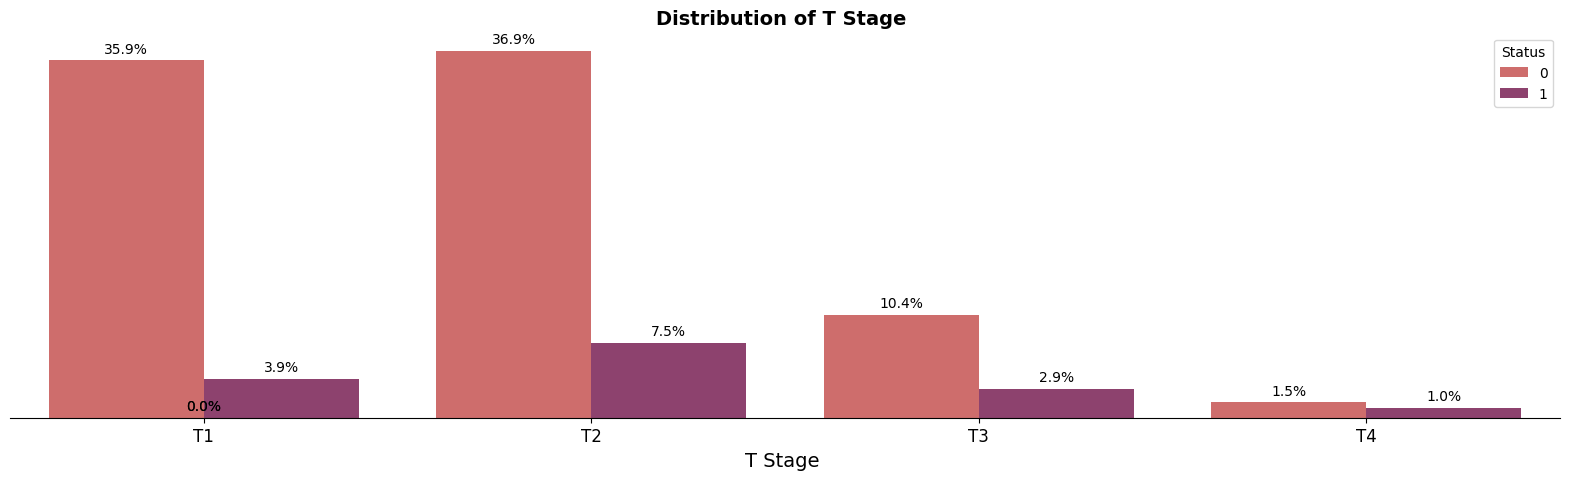

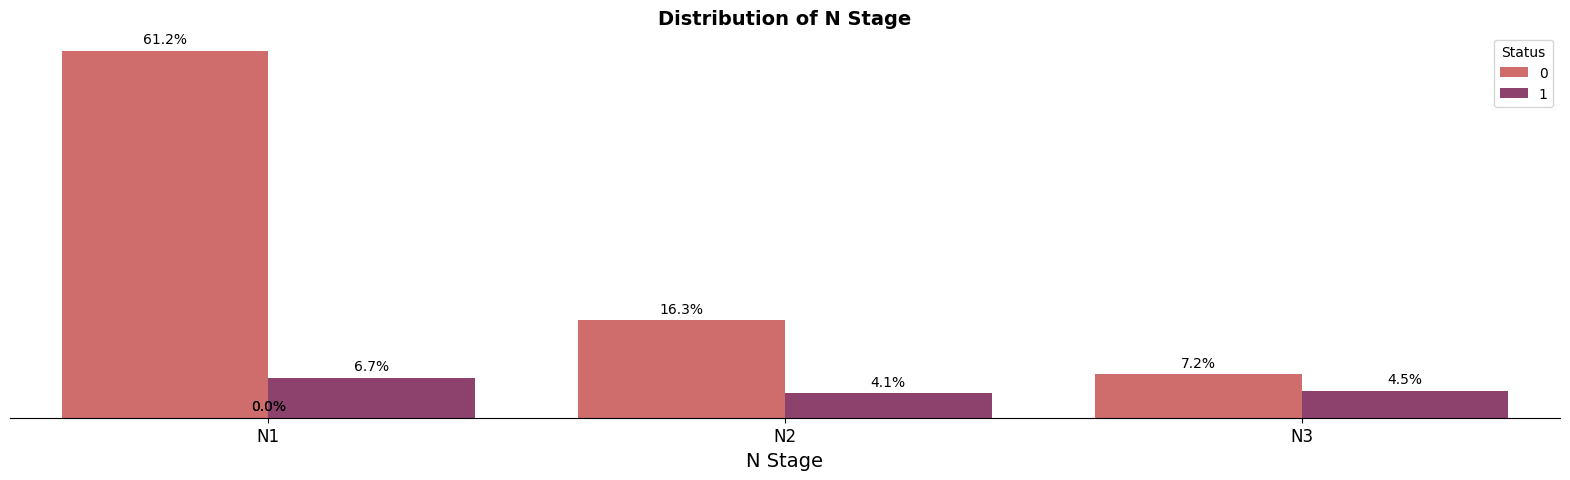

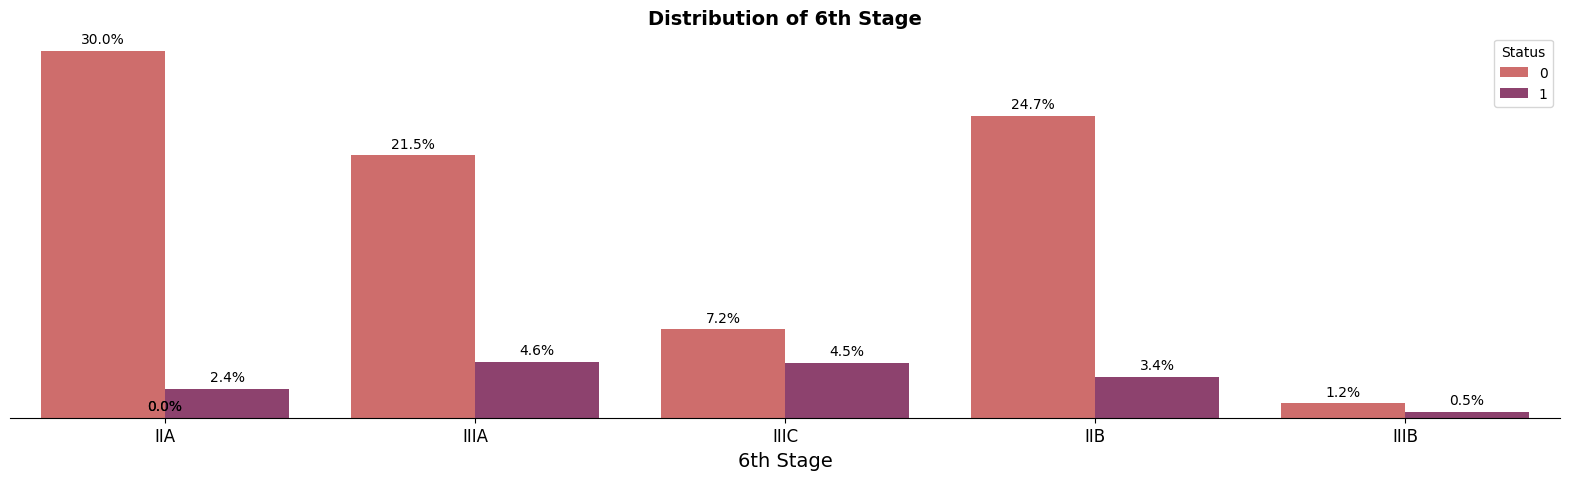

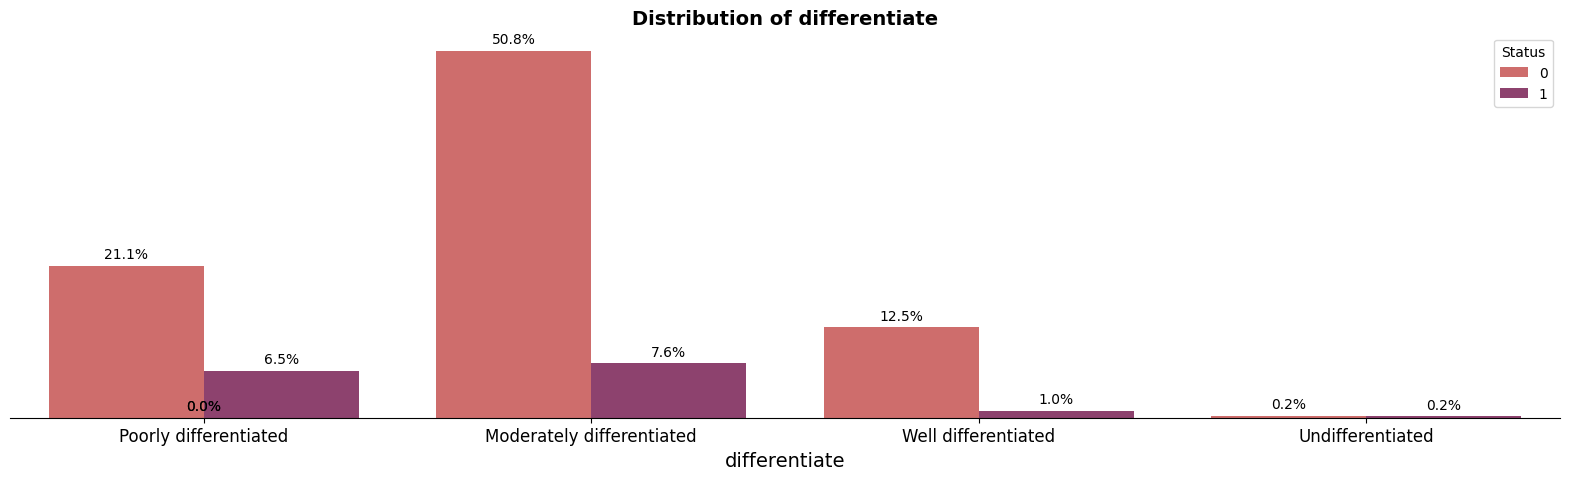

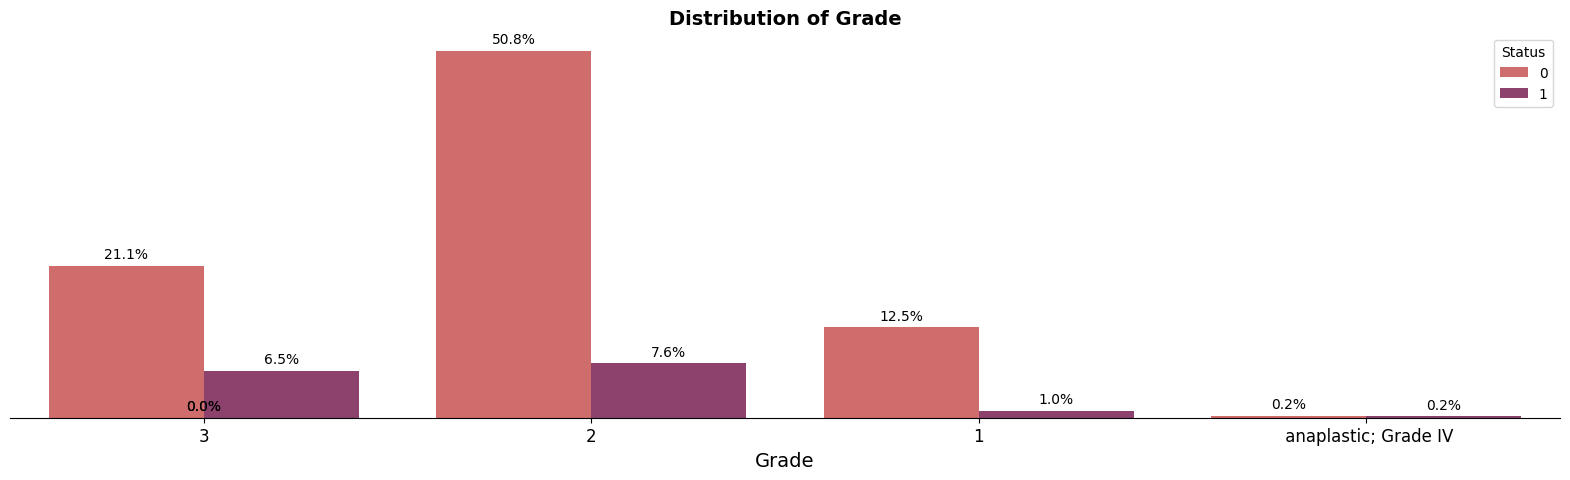

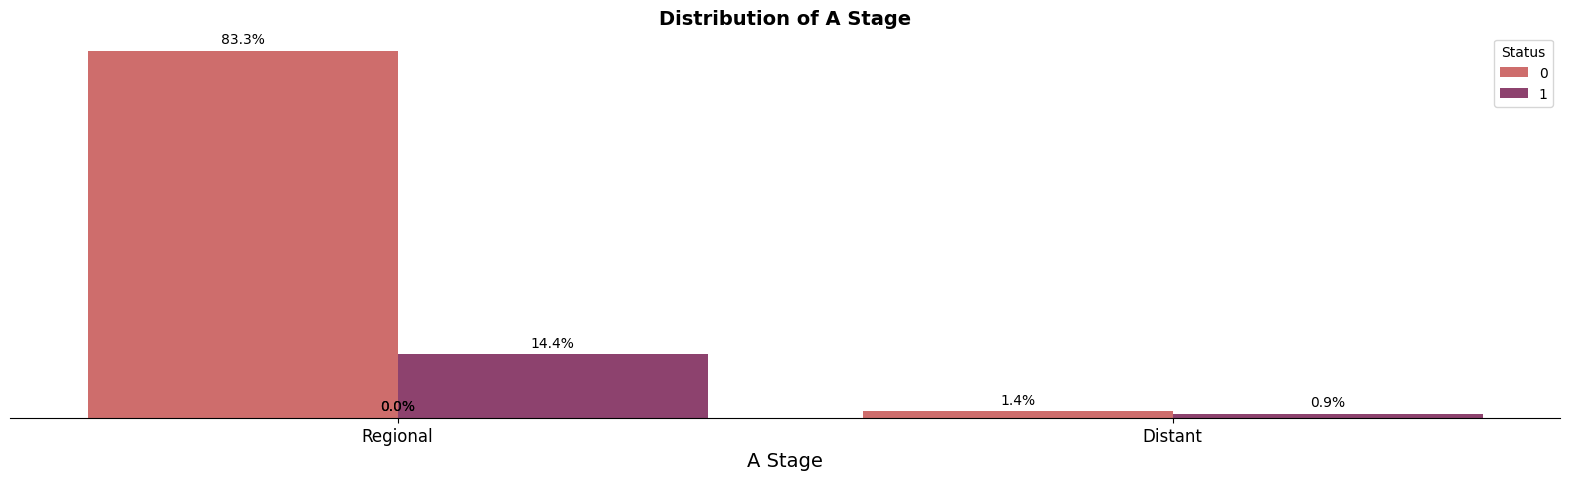

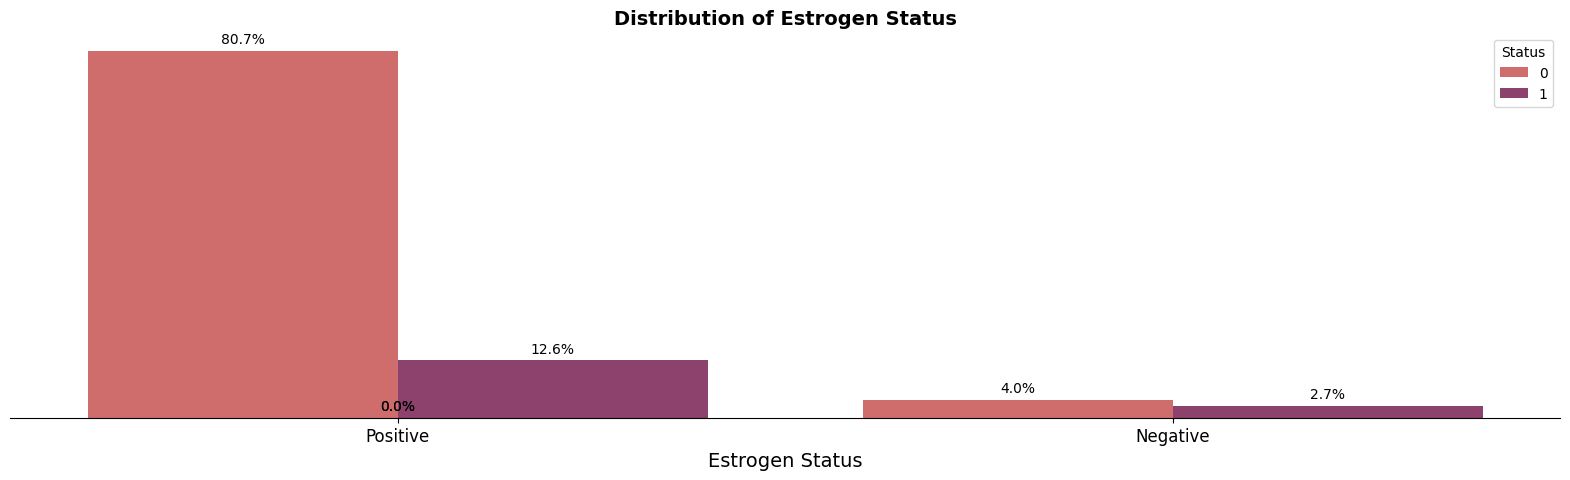

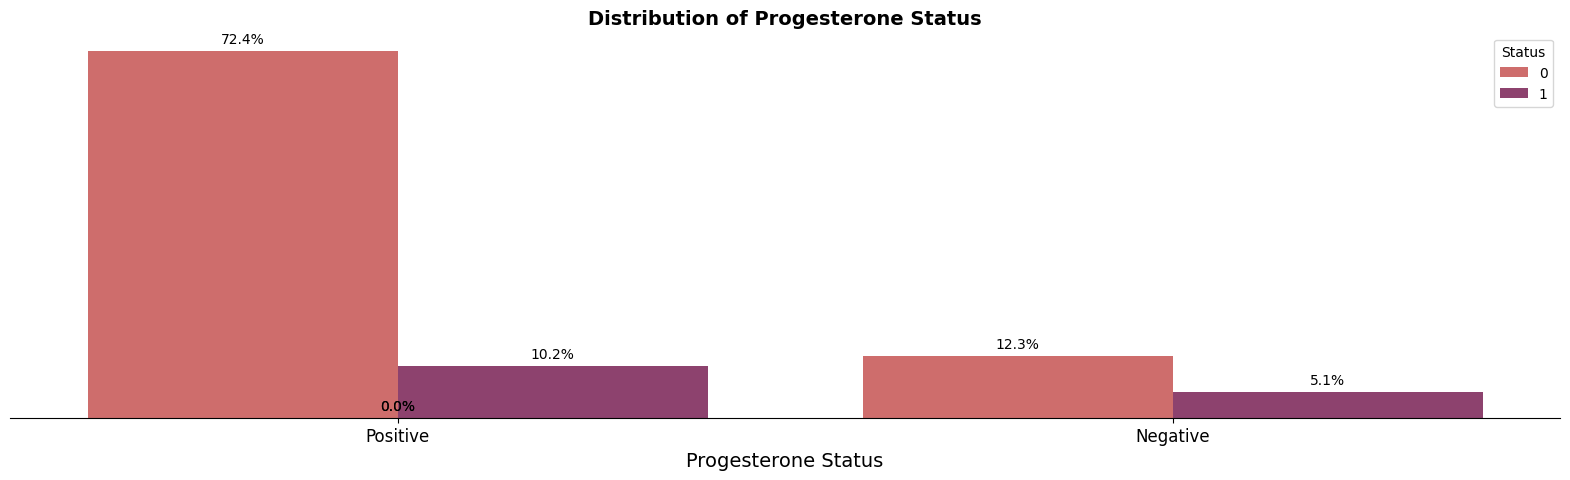

In [10]:
percentPlot(df, df_obj_cols, df_obj_cols, 'Status')


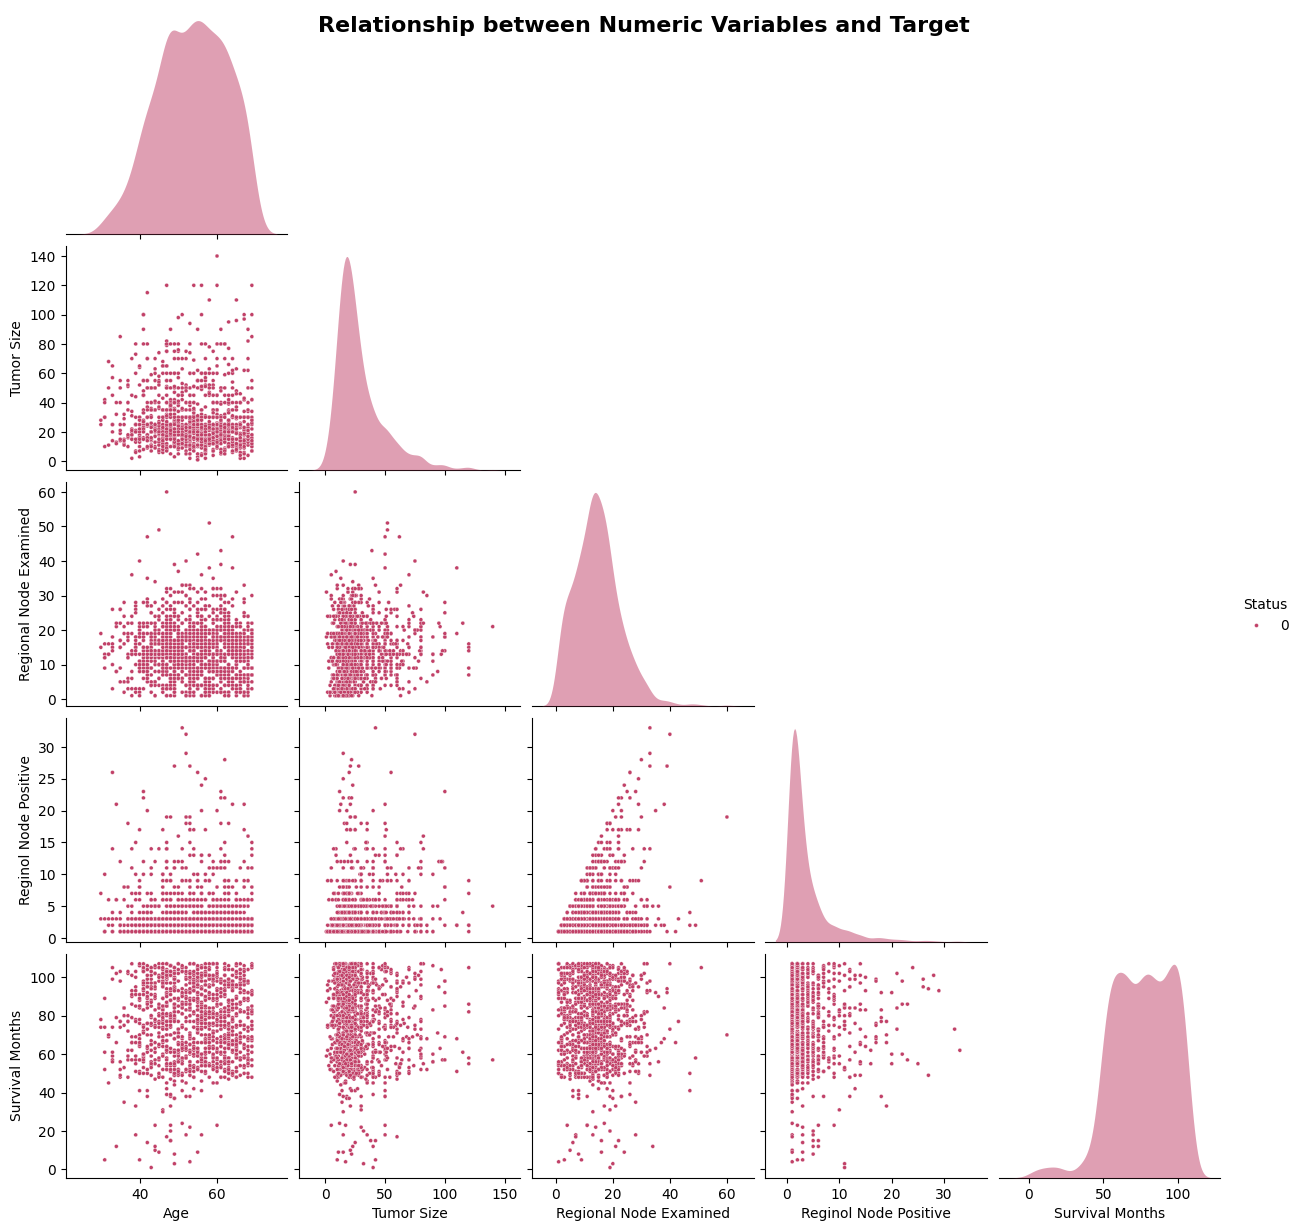

In [13]:
g = sns.pairplot(df_undersample_viz, vars=df_num_cols, hue = 'Status', corner=True, palette = 'flare',
                 plot_kws=dict(s = 8),
                 diag_kws=dict(linewidth=0,alpha=.5));
g.fig.suptitle('Relationship between Numeric Variables and Target',fontsize=16, weight = 'bold');

In [14]:
df["age_group"] = pd.cut(x=df['Age'], bins=[30,34,39,44,49,54,59,64,69],
                        labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
                                 '60-64','65-69'])

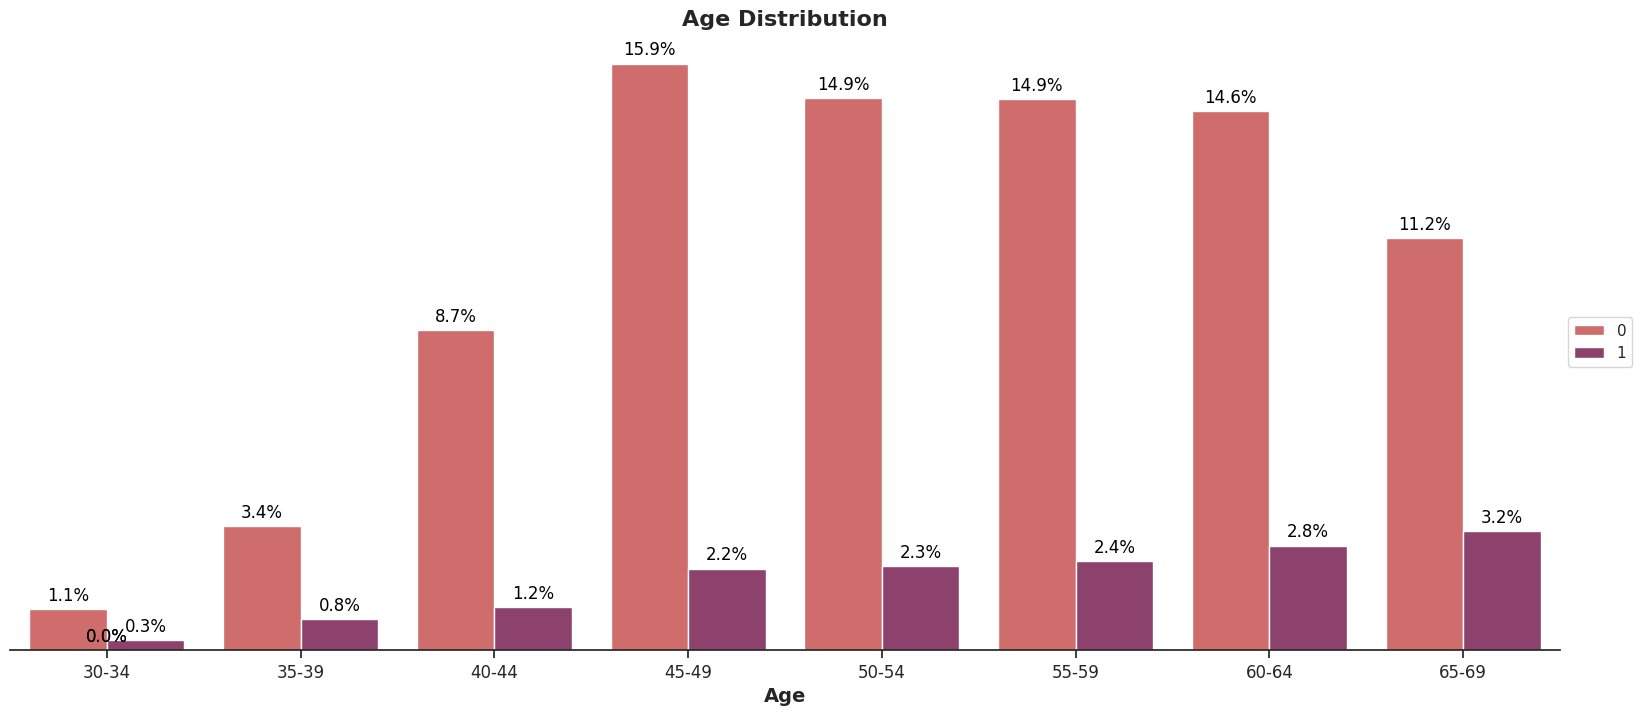

In [15]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = df,x='age_group', palette="flare", hue = 'Status')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y),
                    ha='center', va='bottom',
                    color='black', xytext=(0, 3),
                    rotation = 'horizontal',
                    textcoords='offset points')

sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Age',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False)
plt.title('Age Distribution', fontsize = 16,weight = 'bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [16]:
from scipy.stats import skewtest, kurtosistest, shapiro

a = [print(feat + ': p-value ' +
           '\nSkew ' , np.round(skewtest(df[feat])[1],decimals = 5),
           '\nKurtosis', np.round(kurtosistest(df[feat])[1],decimals = 5),
          '\nNormality', np.round(shapiro(df[feat])[1], decimals = 5),
          '\n**') for feat in df_num_cols]

Age: p-value 
Skew  0.0 
Kurtosis 0.0 
Normality 0.0 
**
Tumor Size: p-value 
Skew  0.0 
Kurtosis 0.0 
Normality 0.0 
**
Regional Node Examined: p-value 
Skew  0.0 
Kurtosis 0.0 
Normality 0.0 
**
Reginol Node Positive: p-value 
Skew  0.0 
Kurtosis 0.0 
Normality 0.0 
**
Survival Months: p-value 
Skew  0.0 
Kurtosis 0.76788 
Normality 0.0 
**


In [17]:
transf_feat_list = ['Reginol Node Positive', 'Tumor Size','Survival Months','Age', 'Regional Node Examined']

def data_transforms(df,features):
    for x in features:
        try:
            df[str(x) + '_tSQRT'] = np.sqrt(df[x])
        except ValueError:
            pass
        try:
            df[x + '_tInvLog'] = 1/np.log10(df[x])
        except ValueError:
            pass
        try:
            df[x + '_tInv'] = 1/(df[x])
        except ValueError:
            pass
        try:
            df[x + '_tLog'] = np.log10(df[x])
        except ValueError:
            pass
        try:
            df[x + '_tPower2'] = df[x]**2
        except ValueError:
            pass
    return df


df = data_transforms(df,transf_feat_list)
transformed_cols = [col for col in df.columns if '_t' in col ]
transformed_cols.extend(transf_feat_list)
transformed_cols.sort()

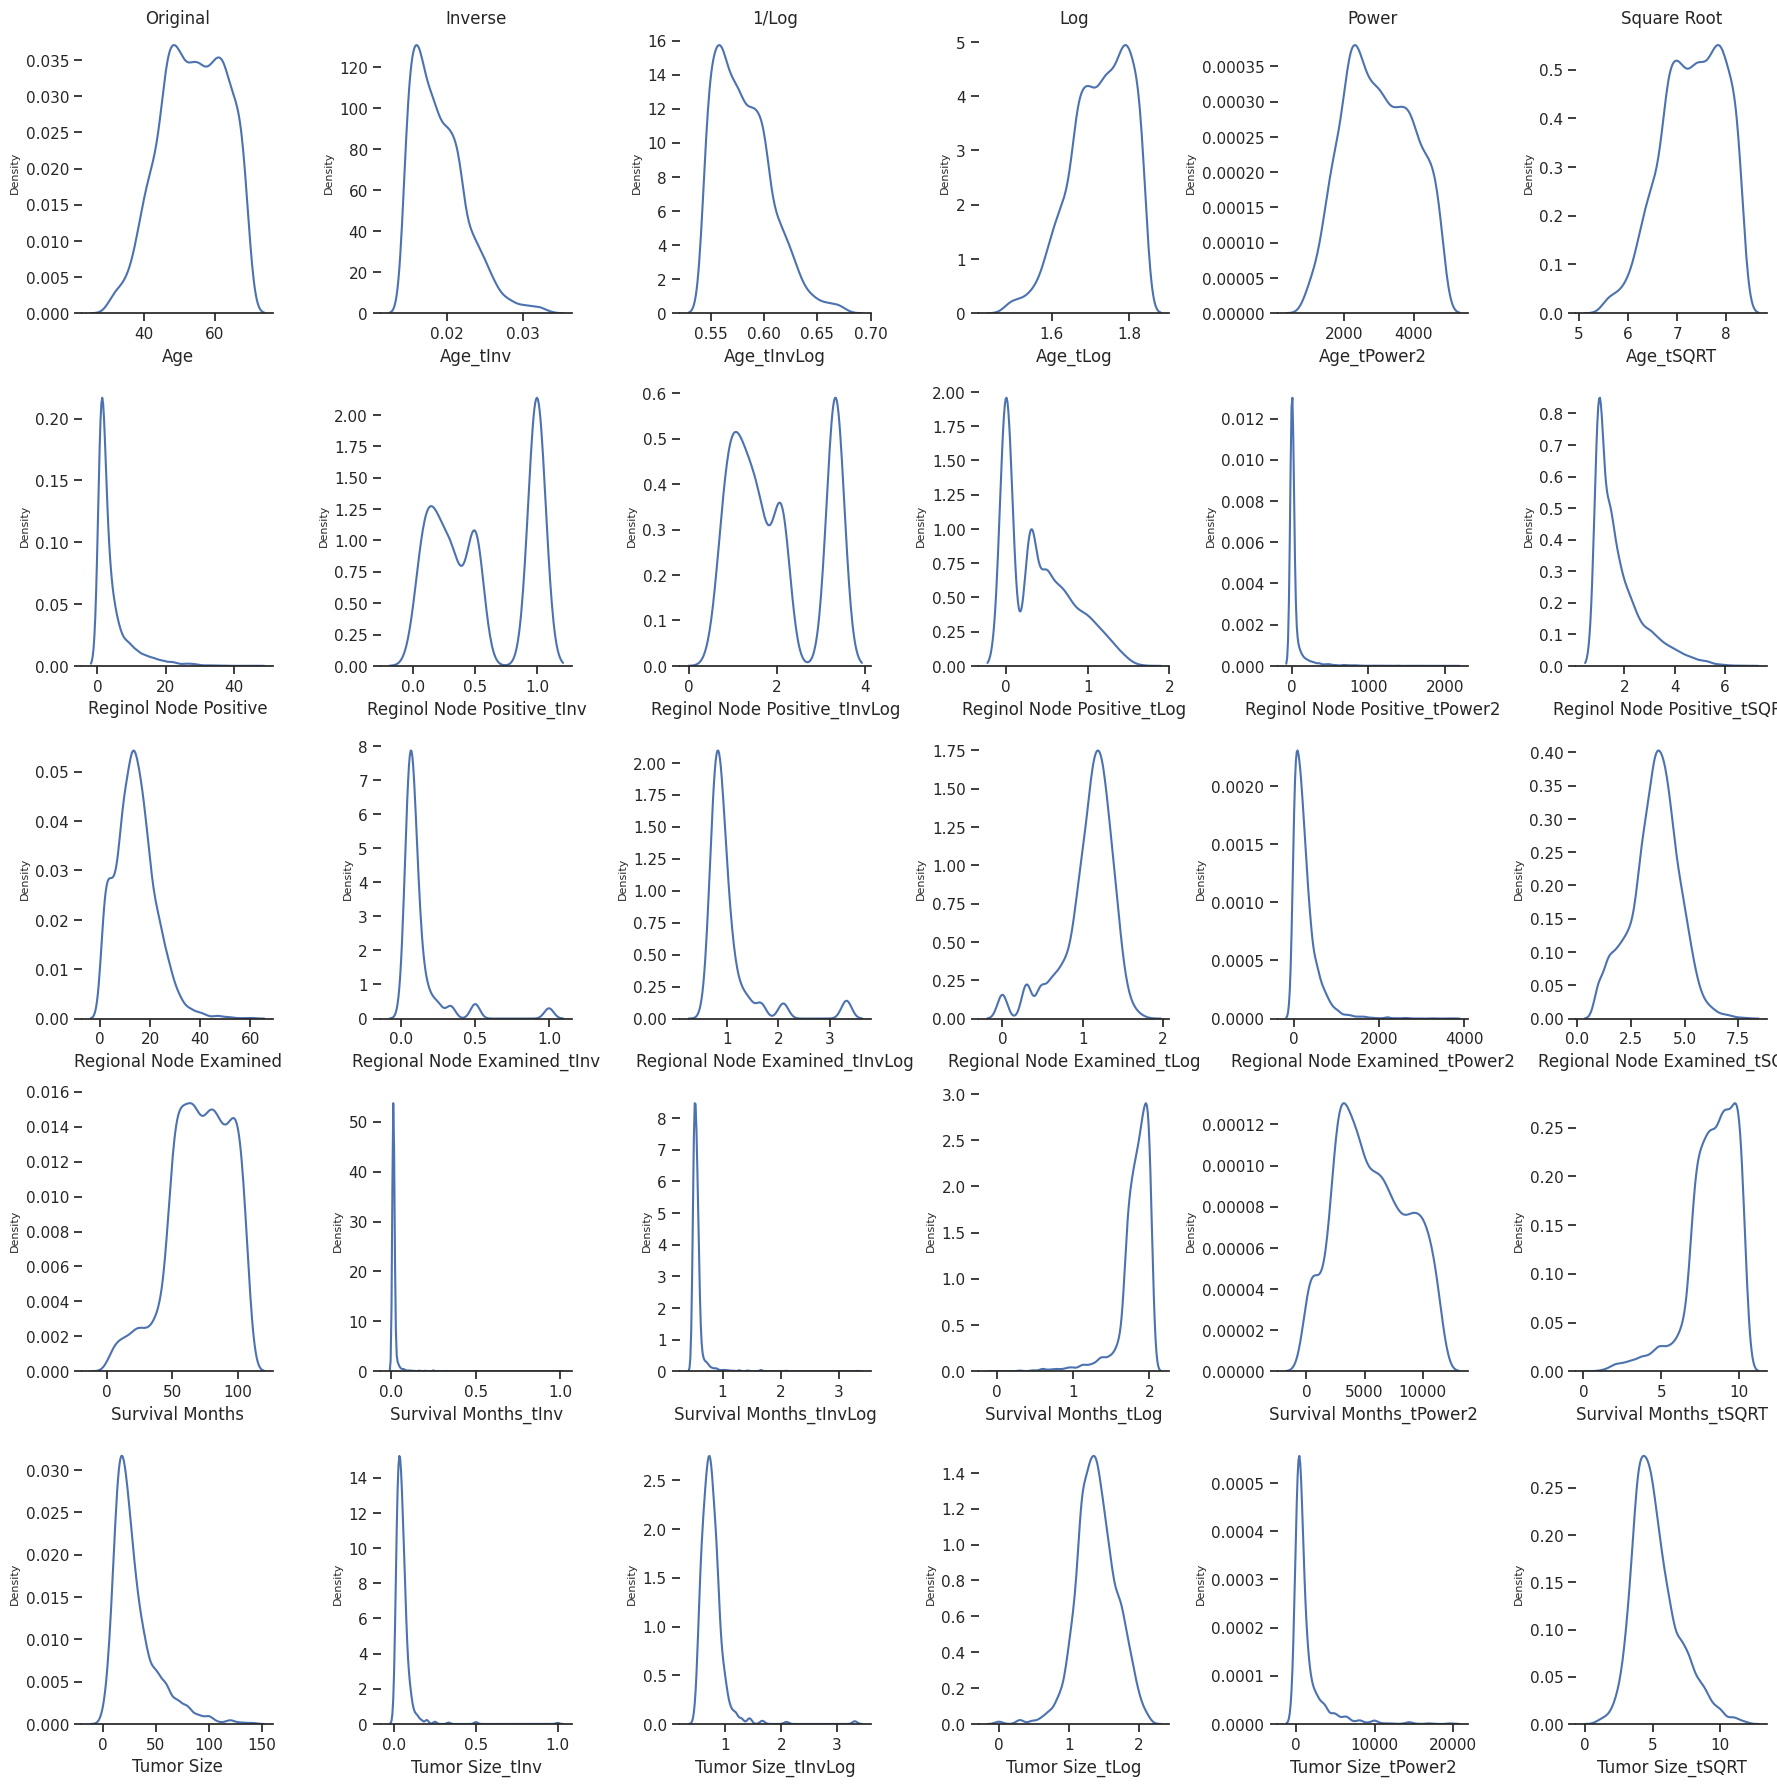

In [18]:
i = 0
rows = len(transf_feat_list)
cols = int(len(transformed_cols)/rows)
col_names = ['Original', 'Inverse', '1/Log', 'Log', 'Power', 'Square Root']

fig, ax = plt.subplots(rows,cols,figsize=(18,18));
for ax, col in zip(ax[0], col_names):
    ax.set_title(col)
for transform in transformed_cols:
    i += 1
    plt.subplot(5,6,i)
    sns.kdeplot(x = transform, data = df)
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.ylabel("Density",fontsize=8)

    plt.grid(False)

fig.tight_layout(pad=1.0)

In [19]:
contingency_race = pd.crosstab(df['Race'], df['Status'])
contingency_race

Status,0,1
Race,,
Black,218,73
Other,287,33
White,2903,510


In [20]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(contingency_race, correction = True)
print('p-value for Race and Status: ', p)
pd.DataFrame(ex, columns = ['Alive', 'Dead'], index = contingency_race.index )

p-value for Race and Status:  8.440928800112451e-07


,Alive,Dead
Race,,
Black,246.453280,44.546720
Other,271.013917,48.986083
White,2890.532803,522.467197


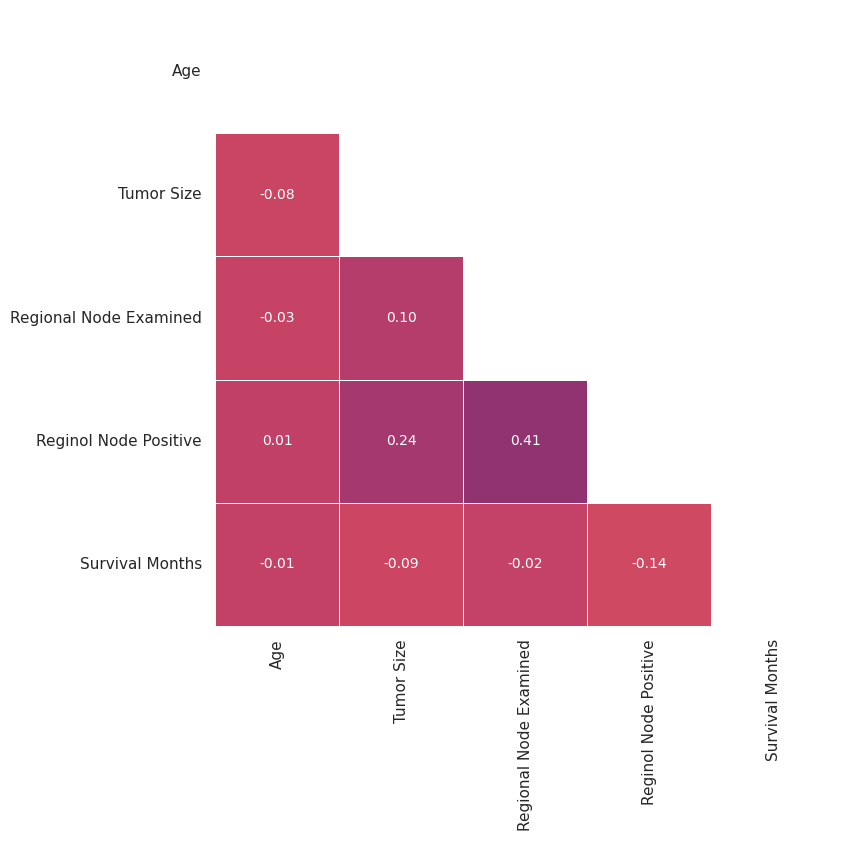

In [21]:
corr = df.loc[:, df_num_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, linewidths=.5,annot=True,fmt=".2f",cmap = 'flare',annot_kws={"size": 10},cbar=False)

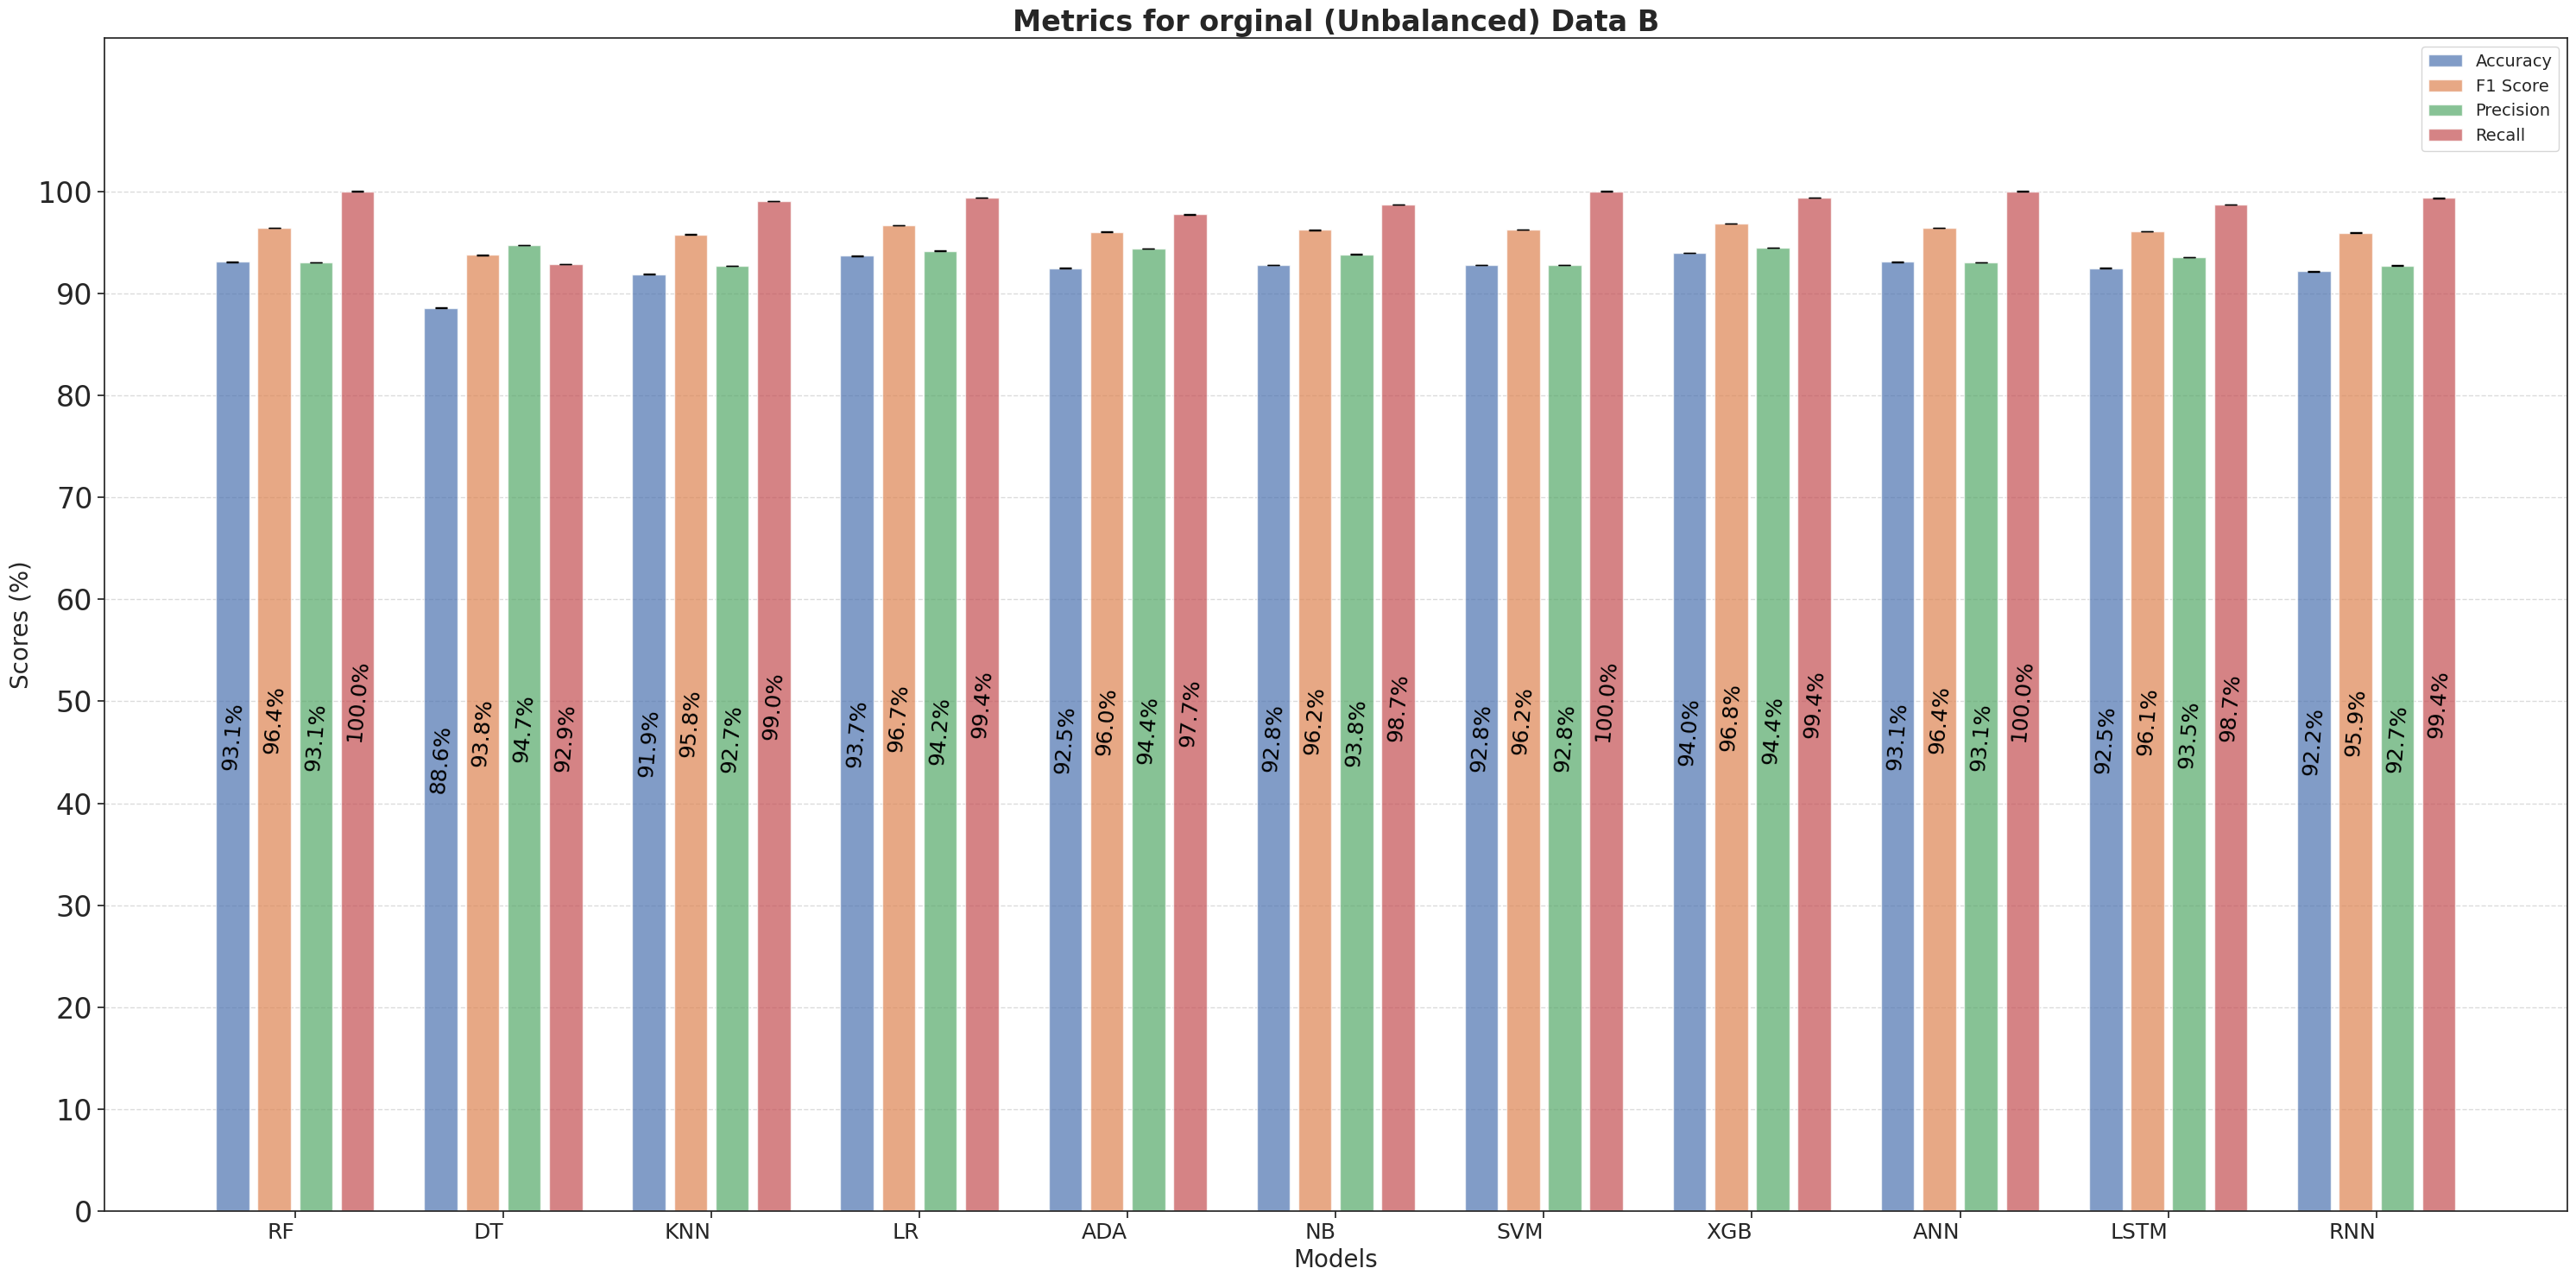

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.9307228915662651, 0.8855421686746988, 0.9186746987951807, 0.9367469879518072, 0.9246987951807228,
    0.927710843373494, 0.927710843373494, 0.9397590361445783, 0.9307228915662651, 0.9246987951807228,
    0.9216867469879518
]]
precision = [100 * x for x in [
    0.9305135951661632, 0.9470198675496688, 0.9270516717325228, 0.9415384615384615, 0.9435736677115988,
    0.9382716049382716, 0.927710843373494, 0.9444444444444444, 0.9305135951661632, 0.9353846153846154,
    0.9272727272727272
]]
recall = [100 * x for x in [
    1.0, 0.9285714285714286, 0.9902597402597403, 0.9935064935064936, 0.9772727272727273,
    0.987012987012987, 1.0, 0.9935064935064936, 1.0, 0.987012987012987, 0.9935064935064936
]]
f1_score = [100 * x for x in [
    0.9640062597809077, 0.9377049180327869, 0.957613814756672, 0.966824644549763, 0.960127591706539,
    0.9620253164556962, 0.9625, 0.9683544303797469, 0.9640062597809077, 0.9605055292259084,
    0.9592476489028213
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.05]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data B.pdf', bbox_inches='tight')
plt.show()
